# 1. 데이터 가져오기

In [1]:
import pandas as pd

In [19]:
df = pd.read_csv("./data/appreply_결측치삭제.csv")

# 2.결측치 확인

In [20]:
df.head()
df.info()
df.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1000 non-null   int64
 1   text        1000 non-null   str  
 2   score       1000 non-null   int64
dtypes: int64(2), str(1)
memory usage: 23.6 KB


Unnamed: 0    0
text          0
score         0
dtype: int64

In [21]:
df["score"].unique()

df.set_index(df.columns[0],inplace=True)
df.head()

,text,score
Unnamed: 0,,
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


# 3. 사본 저장

In [23]:
df.to_csv(
    "./data/appreply_결측치삭제2.csv"
)

In [24]:
df2 = pd.read_csv("./data/appreply_결측치삭제2.csv")

In [28]:
df2.head()
df2 = df2.drop(df2.columns[0],axis=1)

# 4. 데이터 탐색

In [33]:
## score별 데이터확인
score_df = df2["score"].value_counts().sort_index()

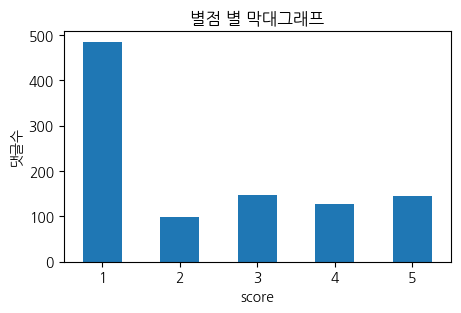

In [34]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(5,3))
score_df.plot(kind="bar")
plt.title("별점 별 막대그래프")
plt.ylabel("댓글수")
plt.xticks(rotation=0)
plt.show()

In [35]:
import numpy as np
# 좋은반응인지 안좋은 반응인지 판단
df2["reaction"] = np.where(df["score"] >3,"긍정","부정")

In [36]:
df2.head()

,text,score,reaction
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4,긍정
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5,긍정
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1,부정
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2,부정
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3,부정


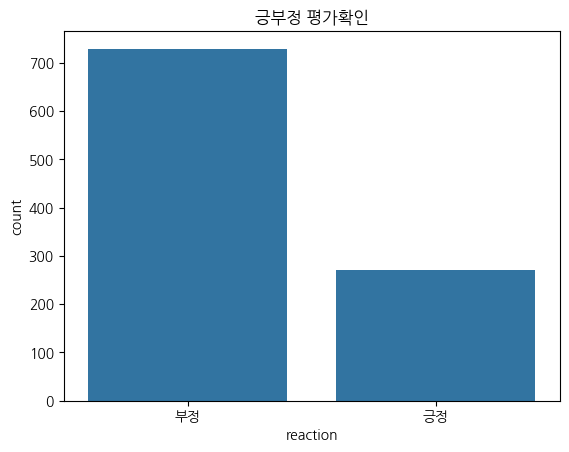

In [39]:
# 긍부정에 대한 챠트
import seaborn as sns

reaction_sum = df2["reaction"].value_counts()

sns.barplot(reaction_sum)
plt.title("긍부정 평가확인")
plt.xticks(rotation=0)
plt.show()

# 4. 글자수 확인하기

In [40]:
df2["textlen"] = df2["text"].str.len()

In [41]:
df2.head()

,text,score,reaction,textlen
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4,긍정,227
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5,긍정,175
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1,부정,229
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2,부정,196
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3,부정,250


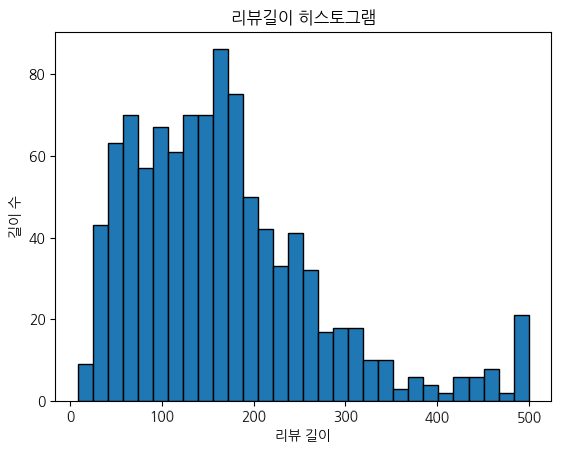

In [42]:
plt.hist(df2["textlen"],bins=30,edgecolor="black")
plt.title("리뷰길이 히스토그램")
plt.xlabel("리뷰 길이")
plt.ylabel("길이 수")
plt.xticks(rotation=1)
plt.show()

In [49]:
# 정규식 표현
import re

In [54]:
#정규표현식 미니미션: 이모지만 제거하고 싶을땐? ([^ \u3131-\u3163\uac00-\ud7a3a-zA-Z0-9\\!\\?\\.\\,]+)
text = ":car: 좋은아침입니다. :smile:"
print(text)
text2 = re.sub("[^\u3131-\u3163\uac00-\ud7a3a-zA-Z0-9\\!\\?\\.\\,]","",text)

## 이모지 제거도구 : uv add emoji
from emoji import core

result = core.replace_emoji(text,"")
print(result)

## :smile: 과같은 이모지 표현 제거
result = re.sub(":[a-zA-Z가-힣0-9_+-]+:","",text)

# ::안에 영어 소문자, 영어 대문자,한글, 숫자, _,+,-,이 있는데 
## []+ :여러개 있을거다
print(result)

:car: 좋은아침입니다. :smile:
:car: 좋은아침입니다. :smile:
 좋은아침입니다. 


In [53]:
from konlpy.tag import Okt

okt = Okt()

In [112]:
# 단어 리스트 만들기

words_list = []
drop_list = ["배달","민족","배민"]

df2.head()

for line in df2["text"]:

    #print(line[:40])
    clean_line = re.sub("[^1-9a-zA-Z가-핳\s]","",line)
    #print(clean_line[:40])
    line_pos = okt.pos(clean_line)
    #print("-"*30)
    for word in line_pos:
        if word[0] in drop_list : continue
        if word[1]=="Noun" and len(word[0]) >1:
            words_list.append(word[0])
    
#print(words_list)


In [111]:
print(len(words_list))
print(np.array(words_list).shape)

19866
(19866,)


# 5. 단어 카운팅 하기

In [94]:
from collections import Counter

word_cnt = Counter(words_list)

In [95]:
word_cnt_most = dict(word_cnt.most_common(30))

# 6. 워드클라우드로 그리기

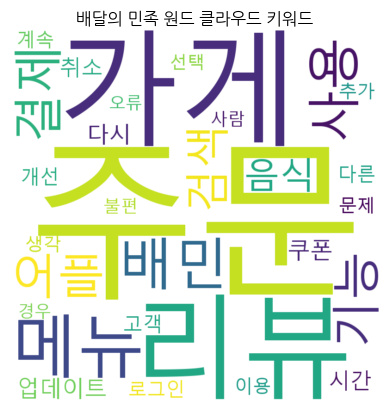

In [96]:
from wordcloud import WordCloud
import koreanize_matplotlib

wc = WordCloud(
    font_path="C\Windows\fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=800
)

wc.generate_from_frequencies(word_cnt_most)

plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 원드 클라우드 키워드")
plt.show()

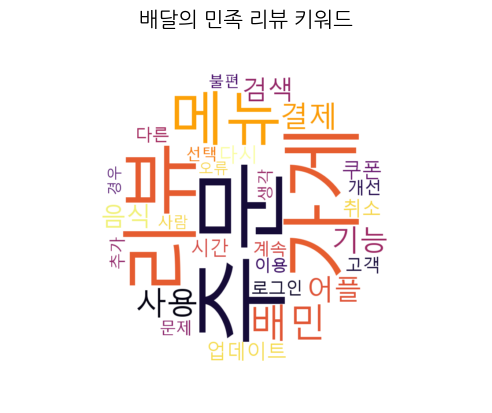

In [101]:
from PIL import Image
import numpy as np

img = Image.open("./data/images/circle.png")
mask_img = np.array(img)

wc = WordCloud(
    font_path="C:\Windows\fonts\malgun.ttf",
    background_color="white",
    mask=mask_img,
    colormap="inferno_r",
    width=800,
    height=800
)
wc.generate_from_frequencies(word_cnt_most)
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 리뷰 키워드",fontsize=15)
plt.show()

In [1]:
import pandas as pd
df2 = pd.read_csv("./data/appreply_결측치삭제.csv",index_col=0)

df2.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


In [2]:
from konlpy.tag import Okt

okt = Okt()

In [6]:
# 단어 리스트 만들기
import re
words_list = []
drop_list = ["배달","민족","배민"]

df2.head()

for line in df2["text"]:

    #print(line[:40])
    clean_line = re.sub("[^1-9a-zA-Z가-핳\s]","",line)
    #print(clean_line[:40])
    line_pos = okt.pos(clean_line)
    #print("-"*30)
    for word in line_pos:
        if word[0] in drop_list : continue
        if word[1]=="Noun" and len(word[0]) >1:
            words_list.append(word[0])

In [38]:
keyword = "메뉴"
df2["text"].str.contains(keyword) # 조건
df2_login = df2.loc[df2["text"].str.contains(keyword),:]

### 4)  워드 클라우드 활용하기

In [39]:
import re
from konlpy.tag import Okt

okt = Okt()

df2_login.shape # 54,2

(184, 2)

In [40]:
words_list = []
drop_list = ["배달","민족","배민","로그인",keyword]

df2.head()

for line in df2_login["text"]:

    #print(line[:40])
    clean_line = re.sub("[^1-9a-zA-Z가-핳\s]","",line)
    #print(clean_line[:40])
    line_pos = okt.pos(clean_line)
    #print("-"*30)
    for word in line_pos:
        if word[0] in drop_list : continue
        if word[1]=="Noun" and len(word[0]) >1:
            words_list.append(word[0])

print(words_list)

['주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '특정', '리뷰', '기능', '검색', '기능', '리뷰', '특정', '검색', '기능', '주문', '수가', '리뷰', '보기', '위서', '래그', '시간', '소요', '비율', '발생', '긍정', '검토', '주심', '주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '검색', '가능', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기', '지역', '가격', '거리', '따라서', '다른', '책정', '방법', '불만', '자체', '위치', '자동', '가격', '메뉴판', '여러', '동네', '기입', '고객', '방식', '운영', '부분', '통일', '철저', '하나', '방법', '모두', '통일', '불만', '자체', '고객', '신경', '그냥', '가격', '방식', '상당', '고객', '입장', '메뉴판', '음식', '중심', '위치', '가게', '부터', '얼마나', '차이', '신경', '가뜩이나', '거기', '추가', '금액', '뭔가', '손보', '불합리', '메뉴판', '자체', '주목', '점주', '각오', '깜빡', '고객', '개선', '이번', '업데이트', '리뷰', '평균', '리뷰', '개선', '검색', '카테고리', '만약', '치즈', '검색', '버거', '치즈', '피자', '치킨', '떡볶이', '등등', '치즈', '검색', '분류', '카테고리', '별로', '지금', '목록', '수정', '위아래', '순서', '변경', '지금', '목록', '순서', '개인', '목록', '정리', '리뷰', '더하기', '쿠폰', '추천', '배너', '자체', '이유', '여러', '주소', '결과', '외진', '이유', '뭔가', '하나', '정렬', '최신

In [41]:
from collections import Counter

cnt_login_df = Counter(words_list)
sum_login_df = dict(cnt_login_df.most_common(20))

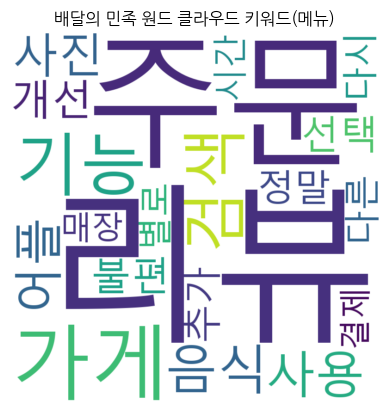

In [42]:
from wordcloud import WordCloud
import koreanize_matplotlib
import matplotlib.pyplot as plt

wc = WordCloud(
    font_path="C\Windows\fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=800
)

wc.generate_from_frequencies(sum_login_df)

plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title(f"배달의 민족 원드 클라우드 키워드({keyword})")
plt.show()

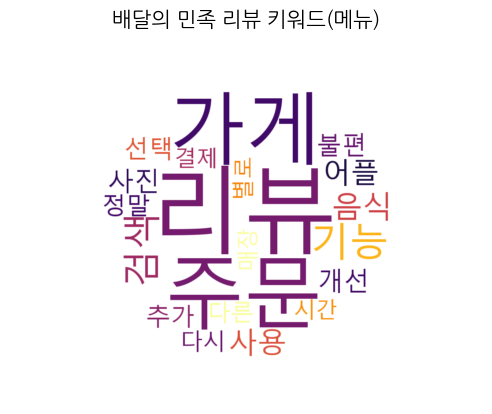

In [43]:
from PIL import Image
import numpy as np


img = Image.open("./data/images/circle.png")
mask_img = np.array(img)

wc = WordCloud(
    font_path="C:\Windows\fonts\malgun.ttf",
    background_color="white",
    mask=mask_img,
    colormap="inferno_r",
    width=800,
    height=800
)
wc.generate_from_frequencies(sum_login_df)
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title(f"배달의 민족 리뷰 키워드({keyword})",fontsize=15)
plt.show()